### Nonintuitive properties of high dimensional space




https://blog.datawow.io/the-curse-of-dimensionality-c99409eb58e9

Hyperspheres inscribed in hypercubes...


![img](sphere.png)

![img](hypersphere.png)

![img](cod.jpeg)

https://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/2


![img](cod2.png)

In [92]:
"""Average distance of points in a hypercube of dimension d"""

import numpy as np

d = 1000

dists = []
for i in range(1000):
    v = np.random.uniform(size=d)
    w = np.random.uniform(size=d)
    dists.append(np.linalg.norm(v-w))
np.mean(dists)

12.912612052476554

### Principal Components Analysis (PCA)

Uses singluar value decomposition:

$$ X = U\Sigma V^T$$

Here $U$ is $N\times N$ and unitary

$\Sigma$ is $N \times d$ and rectangular diagonal

$V$ is $d\times d$ and unitary

The columns of $V$ are the *principal components*.

The principal components are an orthogonal basis for the data space.

Projection onto the first $k$ principal components reduces dimensionality while preserving maximal variance.

This gives a low dimensional version of the data which retains as much information as possible.

### Pictures...

Some images from Geron's *Hands on Machine Learning*

https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb



![img](geron1.png)

![img](geron2.png)

### Axis oriented data

Another use for PCA is to "rectify" the data with respect to the coordinate axes.

This may make certain algorithms work better (eg tree based methods).

http://randomanalyses.blogspot.com/2012/01/principal-components-analysis.html

![img](matlab.png)



In [49]:

D = np.loadtxt(open("num_data.txt", "rb"), delimiter=",", skiprows=0)

col_names = ["ID","Diagnosis","mean_radius","std_err_radius","worst_radius",
            "mean_texture","std_err_texture","worst_texture",
            "mean_perimeter","std_err_perimeter","worst_perimeter",
            "mean_area","std_err_area","worst_area",
            "mean_smoothness","std_err_smoothness","worst_smoothness",
            "mean_compactness","std_err_compactness","worst_compactness",
            "mean_concavity","std_err_concavity","worst_concavity",
            "mean_concave_pts","std_err_concave_pts","worst_concave_pts",
            "mean_symmetry","std_err_symmetry","worst_symmetry",
            "mean_fractal_dim","std_err_fractal_dim","worst_fractal_dim"]
X = np.copy(D[:,2:])
y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}

names = col_names[2:]
X.shape[1],len(names)


(30, 30)

In [50]:
X_centered = X-X.mean(axis=0)
X_centered.mean(axis=0)

array([-1.10608652e-14, -2.84841473e-14, -1.72328467e-14, -3.17883583e-13,
        8.51325454e-17, -6.14500639e-17, -2.46824627e-17,  3.80968446e-17,
       -5.04624657e-17, -1.07315055e-17, -2.75311896e-16, -4.76088608e-16,
        3.76656332e-15, -3.37788770e-14, -2.21794610e-18, -6.67670371e-18,
        2.64873068e-17, -1.67679774e-18, -2.67068148e-18, -7.98003286e-19,
       -1.11826190e-14,  1.08204794e-14, -4.20581359e-14,  2.28772283e-13,
       -1.18753864e-16, -3.46237391e-16,  1.18631915e-16, -1.32680432e-17,
       -1.45314341e-16,  4.52552465e-17])

In [51]:
U,s,V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]
c1

array([-5.08623202e-03, -2.19657026e-03, -3.50763298e-02, -5.16826469e-01,
       -4.23694535e-06, -4.05260047e-05, -8.19399539e-05, -4.77807775e-05,
       -7.07804332e-06,  2.62155251e-06, -3.13742507e-04,  6.50984008e-05,
       -2.23634150e-03, -5.57271669e-02,  8.05646029e-07, -5.51918197e-06,
       -8.87094462e-06, -3.27915009e-06,  1.24101836e-06,  8.54530832e-08,
       -7.15473257e-03, -3.06736622e-03, -4.94576447e-02, -8.52063392e-01,
       -6.42005481e-06, -1.01275937e-04, -1.68928625e-04, -7.36658178e-05,
       -1.78986262e-05, -1.61356159e-06])

In [52]:
## most important features?
np.array(names)[np.argsort(np.abs(c1))]

array(['std_err_concavity', 'worst_smoothness', 'mean_concavity',
       'worst_fractal_dim', 'mean_area', 'worst_compactness',
       'std_err_texture', 'mean_compactness', 'mean_symmetry',
       'worst_perimeter', 'std_err_compactness', 'std_err_fractal_dim',
       'worst_texture', 'std_err_perimeter', 'worst_area',
       'mean_fractal_dim', 'mean_perimeter', 'std_err_symmetry',
       'worst_symmetry', 'std_err_area', 'std_err_radius',
       'mean_smoothness', 'mean_concave_pts', 'mean_radius',
       'worst_concavity', 'worst_radius', 'std_err_concave_pts',
       'std_err_smoothness', 'mean_texture', 'worst_concave_pts'],
      dtype='<U19')

In [53]:
W_2 = V.T[:,:2]
X2D = X_centered.dot(W_2)
X2D.shape

(569, 2)

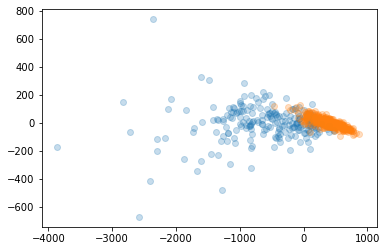

In [54]:

import matplotlib.pyplot as plt

for yy in set(y):
    XX = X2D[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.25)
plt.show()    

In [55]:
from sklearn.decomposition import PCA

pca = PCA()
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(569, 30)

In [56]:
pca.explained_variance_ratio_

array([9.82044672e-01, 1.61764899e-02, 1.55751075e-03, 1.20931964e-04,
       8.82724536e-05, 6.64883951e-06, 4.01713682e-06, 8.22017197e-07,
       3.44135279e-07, 1.86018721e-07, 6.99473205e-08, 1.65908880e-08,
       6.99641650e-09, 4.78318306e-09, 2.93549214e-09, 1.41684927e-09,
       8.29577731e-10, 5.20405883e-10, 4.08463983e-10, 3.63313378e-10,
       1.72849737e-10, 1.27487508e-10, 7.72682973e-11, 6.28357718e-11,
       3.57302295e-11, 2.76396041e-11, 8.14452259e-12, 6.30211541e-12,
       4.43666945e-12, 1.55344680e-12])

In [57]:
np.cumsum(pca.explained_variance_ratio_)

array([0.98204467, 0.99822116, 0.99977867, 0.9998996 , 0.99998788,
       0.99999453, 0.99999854, 0.99999936, 0.99999971, 0.99999989,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [58]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [59]:
X.shape

(70000, 784)

In [60]:
pca = PCA()
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(70000, 784)

In [61]:
np.cumsum(pca.explained_variance_ratio_)[:50]

array([0.09746116, 0.16901561, 0.23051091, 0.28454476, 0.3334341 ,
       0.37648637, 0.40926898, 0.4381654 , 0.46574904, 0.48917044,
       0.51023733, 0.53061286, 0.5476835 , 0.5646237 , 0.58045752,
       0.59532097, 0.60851456, 0.6213047 , 0.63317742, 0.64470679,
       0.65536719, 0.66546513, 0.67505665, 0.684153  , 0.69298586,
       0.70137405, 0.70947236, 0.71732954, 0.72473217, 0.73163231,
       0.73819375, 0.74464845, 0.75065664, 0.75651276, 0.7621803 ,
       0.767615  , 0.77266217, 0.77753297, 0.78232252, 0.78699846,
       0.79154214, 0.79599132, 0.80017349, 0.80413513, 0.8079722 ,
       0.81173005, 0.81534432, 0.81883456, 0.82222188, 0.82541884])

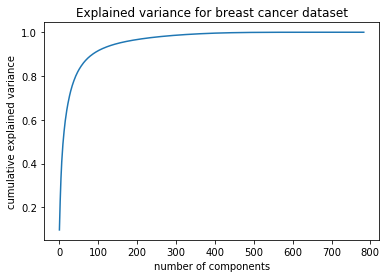

In [62]:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Explained variance for breast cancer dataset")
plt.show()

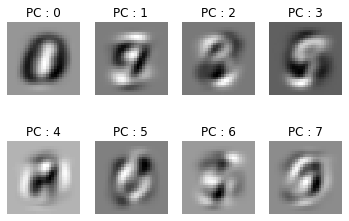

In [63]:
pca.components_

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(pca.components_, range(8)))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('PC : {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('PC : {}'.format(label))

In [64]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X) ## autocentered
Xpca.shape

(70000, 2)

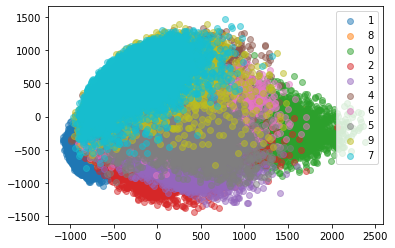

In [65]:

for yy in set(y):
    XX = Xpca[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

In [89]:
"""X_centered = X-X.mean(axis=0)
X_centered.mean(axis=0)

U,s,V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]
c1"""
### Computationally infeasible

'X_centered = X-X.mean(axis=0)\nX_centered.mean(axis=0)\n\nU,s,V = np.linalg.svd(X_centered)\nc1 = V.T[:,0]\nc2 = V.T[:,1]\nc1'

In [67]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)


pca = PCA(n_components=0.95)
Xpca_train = pca.fit_transform(X_train) ## autocentered
Xpca_test = pca.transform(X_test)

Xpca_train.shape

(52500, 153)

In [68]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.9673714285714285

In [69]:
model = RandomForestClassifier()
model.fit(Xpca_train,y_train)
model.score(Xpca_test,y_test)


0.9463428571428572

In [70]:
#%timeit model.fit(Xpca_train,y_train)
#1min 5s ± 4.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
#%timeit model.fit(X_train,y_train)
#23.6 s ± 422 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### "Decompressing" from the PCA transform

By inverting the PCA transformation we can visualize how much information is lost in the projection.

$$X_{\text{recovered}} = X_{d-\text{proj}}\cdot W_d^T$$

where $W_d = $`V.T[:,:d]`

In [72]:
X_recovered = pca.inverse_transform(Xpca_train)

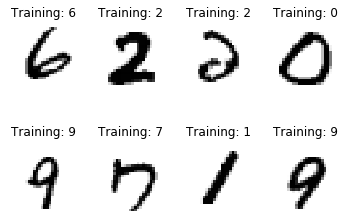

In [73]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X_train, y_train))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))

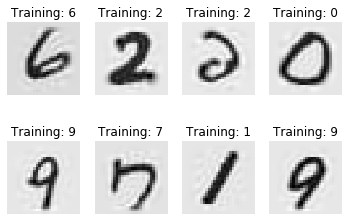

In [74]:
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(X_recovered, y_train))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))
for ax, (image, label) in zip(axes[1, :], images_and_labels[4:8]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: {}'.format(label))

### Manifold Learning

https://scikit-learn.org/stable/modules/manifold.html



### Locally Linear Embedding

https://cs.nyu.edu/~roweis/lle/algorithm.html

First measure how each training instance linearly relates to its closest neighbors.

Then look for a low dimensional representation where these local relationships are best preserved.

This is particularly good at "unrolling" manifolds. 

First:

For each $\bar{x}$ in $X$, identify $k$ closest neighbors ($k=10$?)

Second:

Compute

$$\hat{W} = \text{argmin}_W \sum_{i=1}^N |\!|\bar{x}_i - \sum_{j=1}^N w_{i,j}\bar{x}_j |\!|^2$$

Subject to:

$w_{i,j} = 0$ if $\bar{x}_j$ is not in knn $\bar{x}_i$.

$\sum_{j=1}^N w_{i,j} =1$ for $i=1,2,\ldots,N$.

Now $\hat{W}$ stores local linear relationships.

Now compute

$$\hat{Z} = \text{argmin}_Z \sum_{i=1}^N |\!|\bar{z}_i - \sum_{j=1}^N w_{i,j}\bar{z}_j |\!|^2$$

![img](lle.gif)

In [75]:
from sklearn.manifold import LocallyLinearEmbedding

#lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,n_jobs=-1)
#Xlle = lle.fit_transform(X)


In [76]:
#for yy in set(y):
#    XX = Xlle[y==yy]
#    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
#plt.legend()    
#plt.show()  

In [77]:
## Breast cancer
import matplotlib.pyplot as plt
import numpy as np
X = np.copy(D[:,2:])

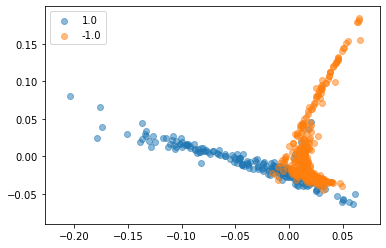

In [81]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10)
Xlle = lle.fit_transform(X)
y = 2*D[:,1] -1  # so that y in {-1,1}, not {0,1}

for yy in set(y):
    XX = Xlle[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

### LLE run time

$O(N\log(N)d\log(k))$ to find KNN

$O(Ndk^3)$ for computing $\hat{W}$

$O(dN^2)$ for computing $\hat{Z}$


### Other methods...


### t-Distributed Stochastic Neighbor Embedding (t-SNE)

"Reduces dimensionality while trying to keep similar instances close and dissimilar instances apart"


In [83]:
from sklearn.manifold import TSNE
Xtsne = TSNE(n_components=2).fit_transform(X)

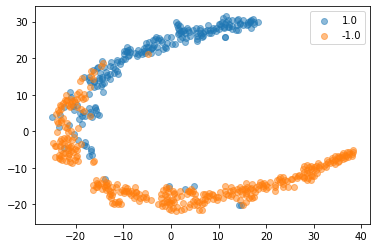

In [84]:

for yy in set(y):
    XX = Xtsne[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  

### Isomap

"creates a graph by connecting each instance to its nearest neighbors, then reduces dimensionality while trying to preserve geodesic (graph) distances between the instances"

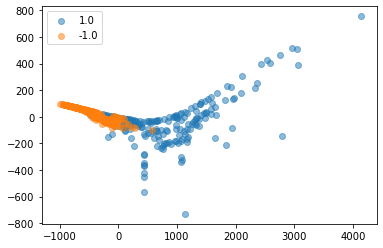

In [87]:
from sklearn.manifold import Isomap

X_iso = Isomap(n_components =2).fit_transform(X)

for yy in set(y):
    XX = X_iso[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  


### Multidimensional Scaling

"reduces dimensionality while trying to preserve the distances between the instances"


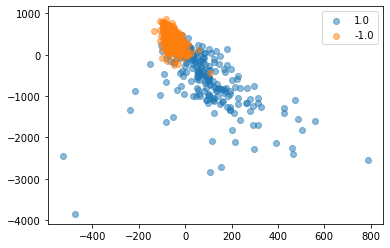

In [88]:
from sklearn.manifold import MDS

X_mds = MDS(n_components=2).fit_transform(X)

for yy in set(y):
    XX = X_mds[y==yy]
    plt.scatter(XX[:,0],XX[:,1],alpha=0.5,label=yy)
plt.legend()    
plt.show()  
